In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("survey_results_public.csv")
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [75]:
# Columns
columnheaders = df.columns
columnheaders

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [76]:
# Industries
industries = df['Industry'].unique()
industries

array([nan,
       'Information Services, IT, Software Development, or other Technology',
       'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain',
       'Retail and Consumer Services', 'Higher Education',
       'Legal Services', 'Insurance', 'Healthcare', 'Oil & Gas',
       'Wholesale', 'Advertising Services'], dtype=object)

In [208]:
import math
# Count langauges used
def countLanguagesUsed(df, column='LanguageHaveWorkedWith'):
    languageUsedCount = {}
    languagesUsedResponses = df[column]
    for response in languagesUsedResponses:
        if not isinstance(response, float):
            languages = response.split(";")
            for lang in languages:
                try:
                    languageUsedCount[lang] += 1
                except KeyError:
                    languageUsedCount[lang] = 1
                except:
                    raise RuntimeError
    return pd.DataFrame.from_dict(languageUsedCount, orient='index', columns=['count'])

In [226]:
def plotbarhelper(x, y, title):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(20, 10))
    plt.grid()
    sns.barplot(
        x = x,
        y = y,
    )

    plt.title(title, fontsize=40)
    plt.xlabel("Language", fontsize=20)
    plt.ylabel("Percentage of Responses", fontsize=20)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim([0, 100])

In [228]:
def plotLanguages(df, column_to_count = "LanguageHaveWorkedWith", plot_title=''):

    languageCount = countLanguagesUsed(df, column_to_count).sort_values('count', ascending=False)

    plotbarhelper(
        x=list(languageCount.index)[0:20],
        y=list(languageCount['count'].values[0:20]/len(df)*100),
        title=plot_title
    )
    

# Filter by industry (Healthcare)

In [231]:
df_Healthcare = df[
    df['Industry'] == 'Healthcare'
    ]
df_Healthcare.head(10)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
88,89,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",In-person,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,None of these,Healthcare,Too long,Neither easy nor difficult,24345.0
172,173,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,Automated testing;Observability tools;Develope...,Healthcare,Appropriate in length,Easy,NaN
198,199,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,6-10 times a week,10+ times a week,3-5 times a week,30-60 minutes a day,Over 120 minutes a day,DevOps function;Microservices;Automated testin...,Healthcare,Appropriate in length,Easy,138033.0
208,209,I agree,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",In-person,Professional development or self-paced learnin...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,3-5 times a week,Never,Never,30-60 minutes a day,Less than 15 minutes a day,None of these,Healthcare,Too long,Neither easy nor difficult,NaN
242,243,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,1-2 times a week,Less than 15 minutes a day,Less than 15 minutes a day,Microservices;Developer portal or other centra...,Healthcare,Appropriate in length,Neither easy nor difficult,NaN
247,248,I agree,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training,NaN,...,1-2 times a week,3-5 times a week,3-5 times a week,Less than 15 minutes a day,15-30 minutes a day,AI-assisted technology tool(s),Healthcare,Too long,Neither easy nor difficult,10000.0
285,286,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Hackathons (virtual or ...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,Never,30-60 minutes a day,30-60 minutes a day,None of these,Healthcare,Appropriate in length,Neither easy nor difficult,33000.0
306,307,I agree,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,60-120 minutes a day,30-60 minutes a day,Automated testing,Healthcare,Appropriate in length,Easy,91026.0
320,321,I agree,I am a developer by profession,55-64 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects

/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-

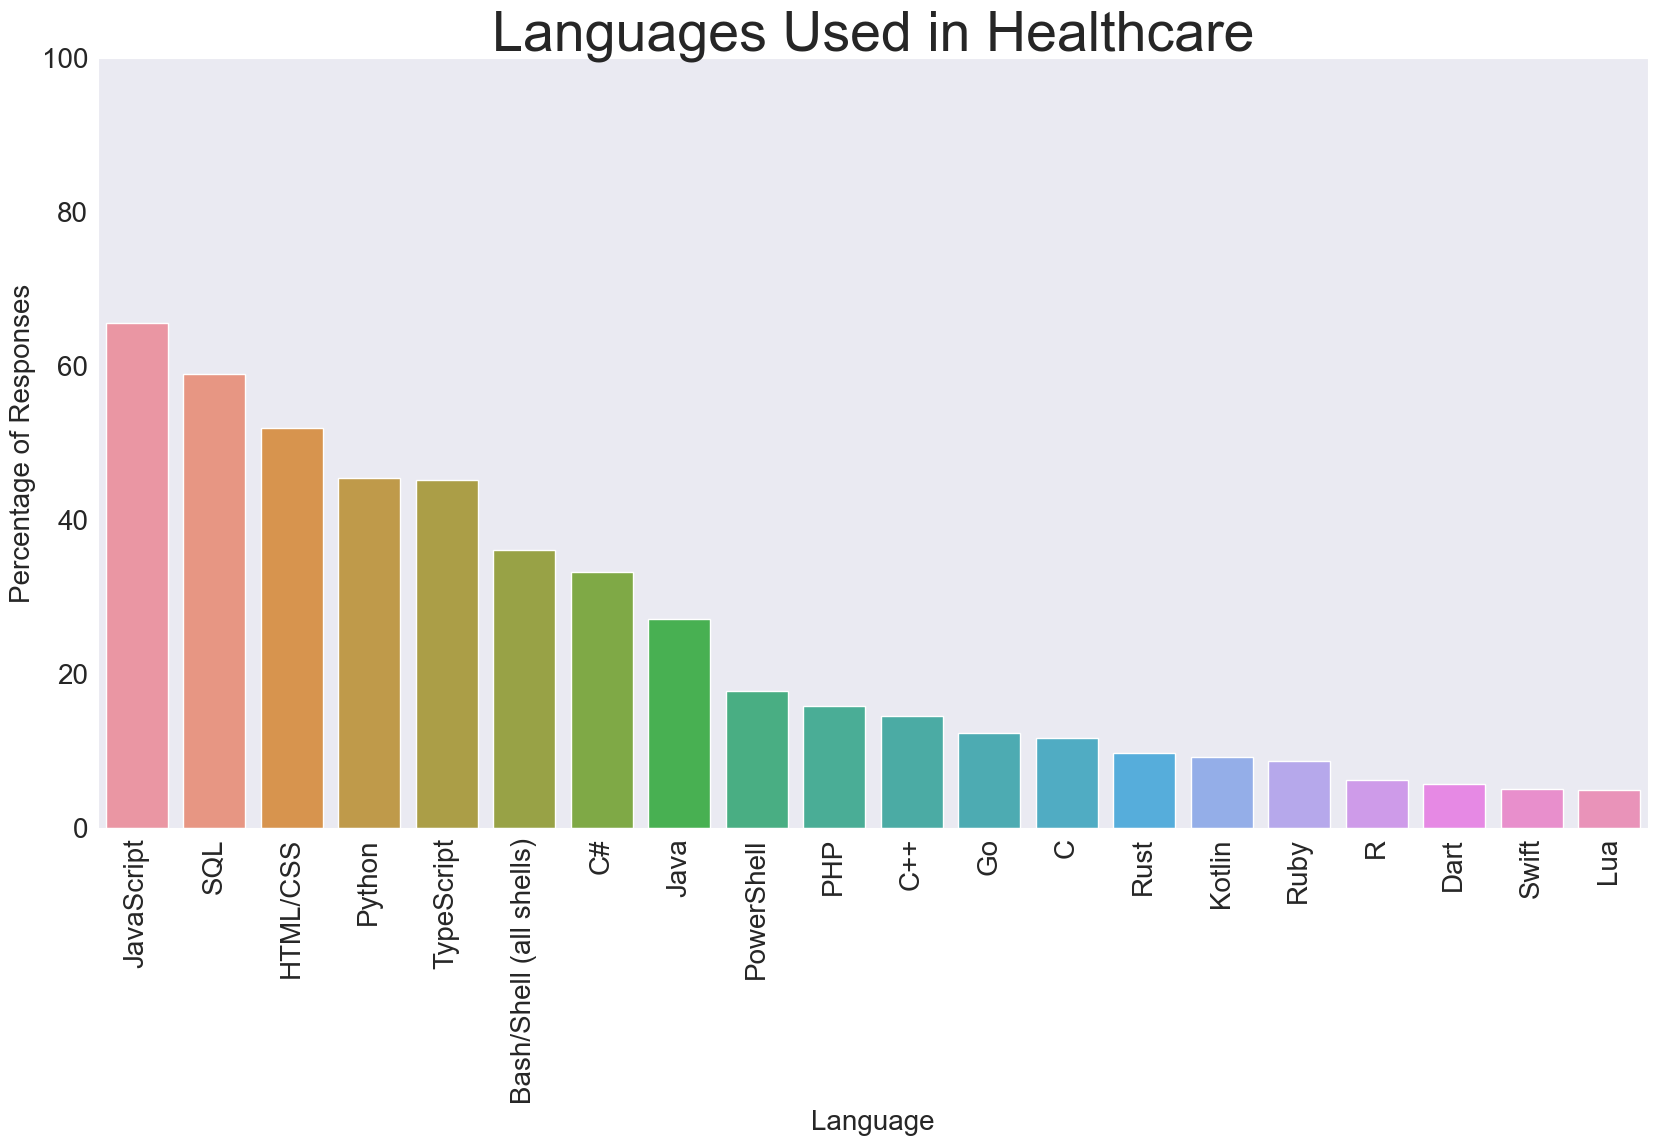

In [230]:
plotLanguages(df_Healthcare, column_to_count="LanguageHaveWorkedWith", plot_title="Languages Used in Healthcare")

# Further segmented by Developer Type

## Scientists, Academic Researchers

/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-

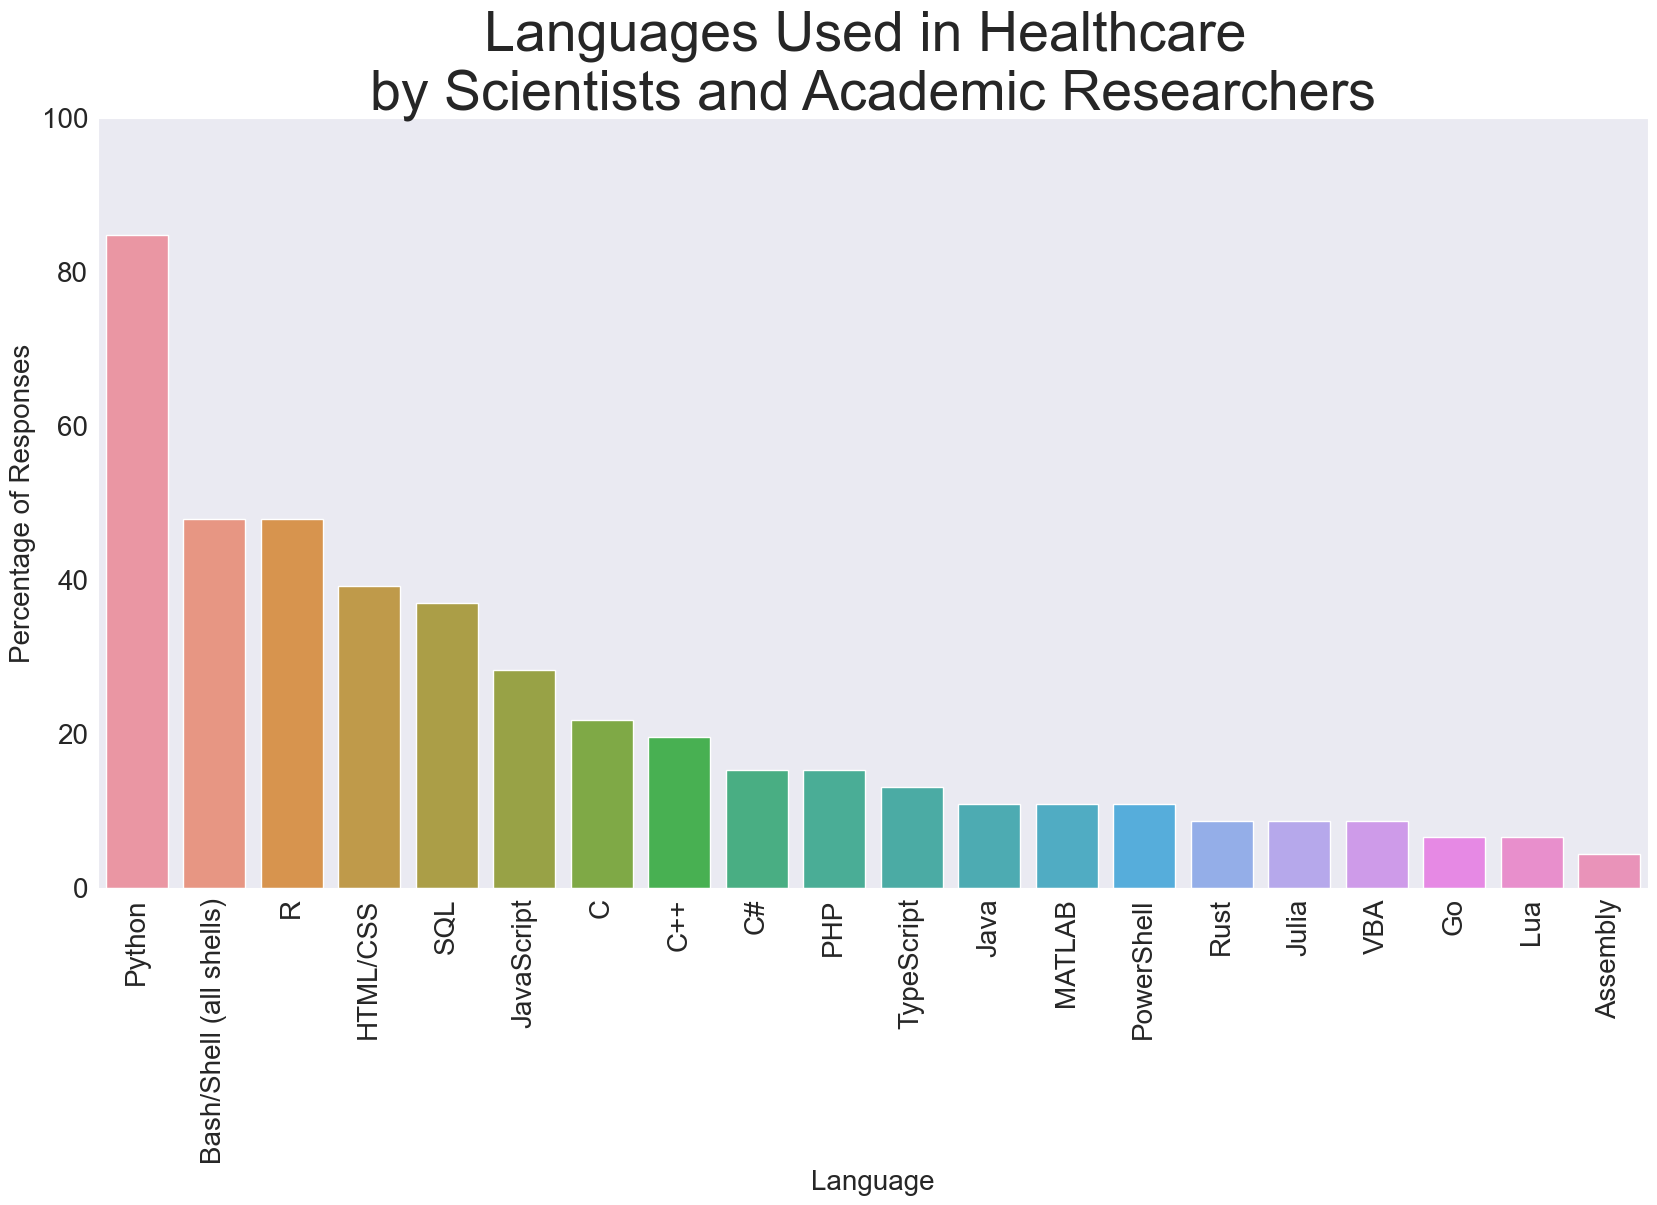

In [233]:
sciencey_jobs = ["Academic researcher", "Scientist"]

df_Healthcare_scienceyjobs = df_Healthcare[
    df_Healthcare["DevType"].isin(sciencey_jobs)
]

plotLanguages(
    df_Healthcare_scienceyjobs, 
    plot_title="Languages Used in Healthcare \nby Scientists and Academic Researchers"
)

/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-

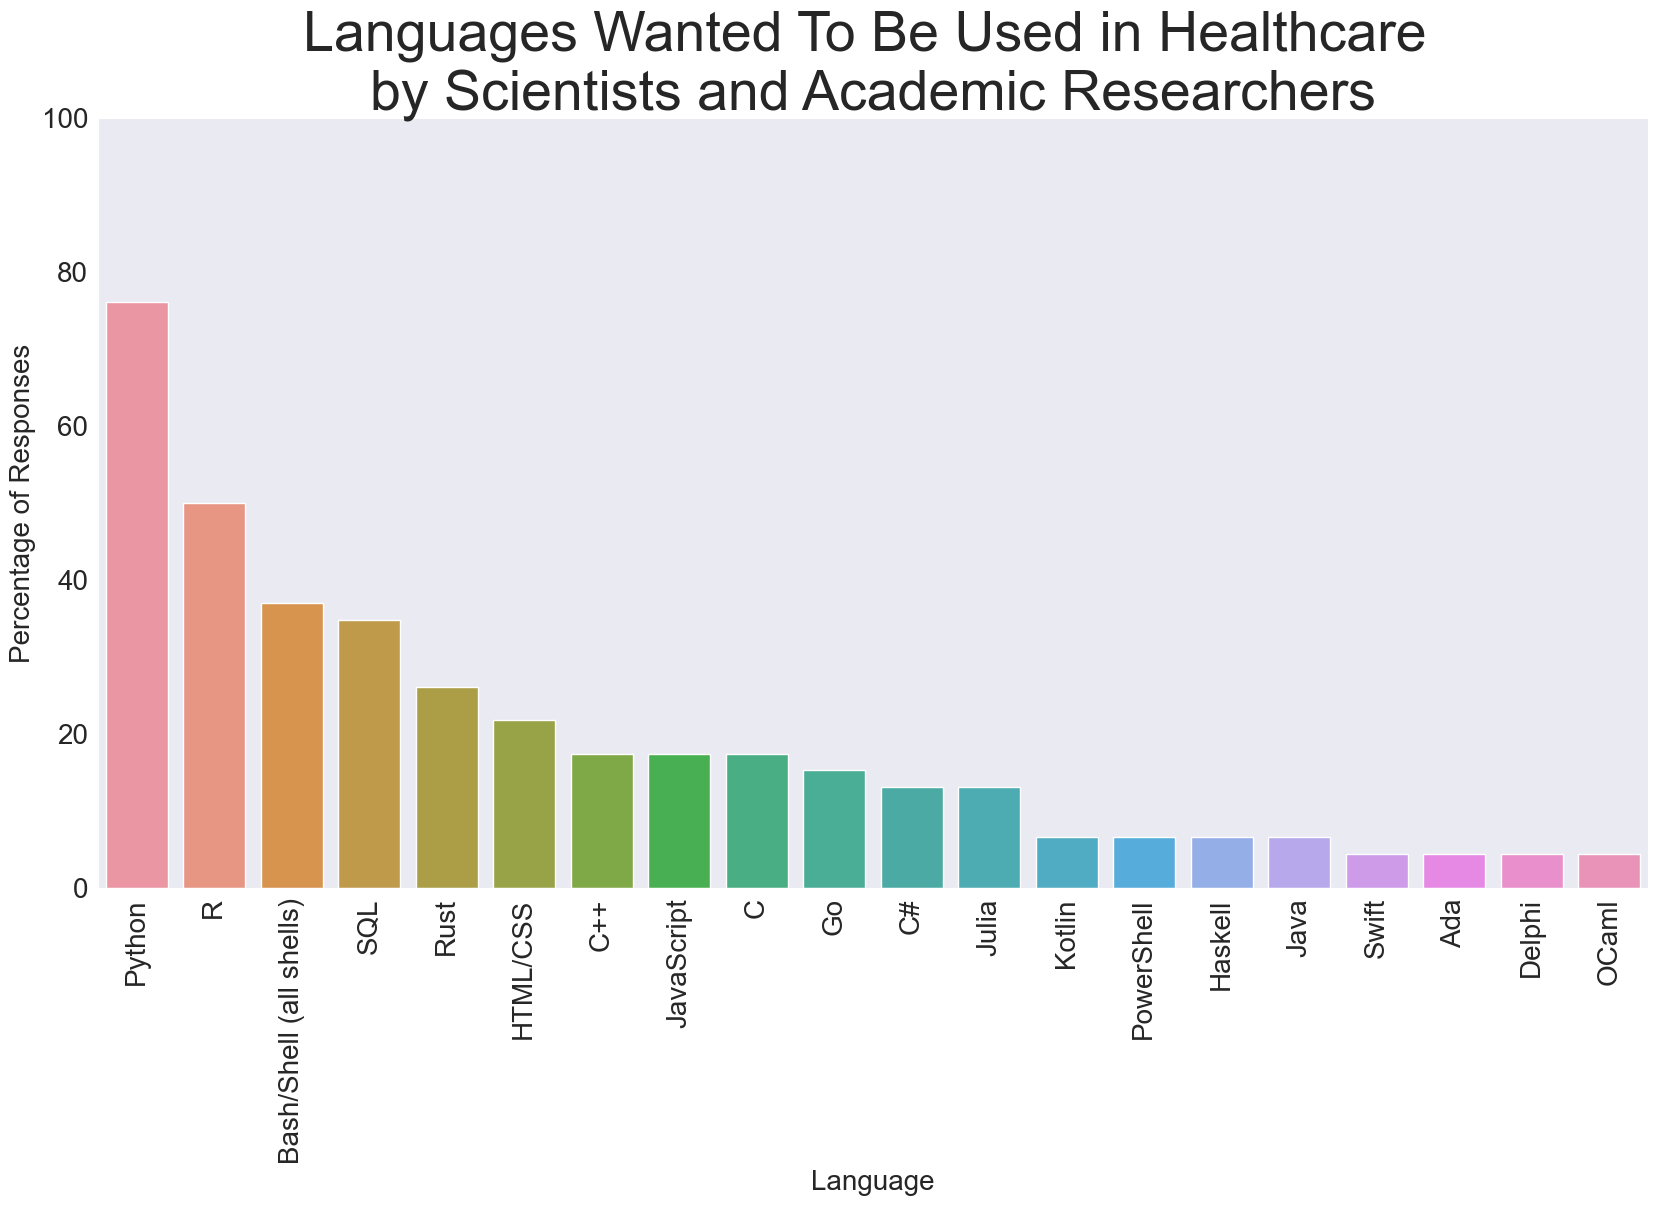

In [240]:
plotLanguages(
    df_Healthcare_scienceyjobs, 
    column_to_count = "LanguageWantToWorkWith",
    plot_title="Languages Wanted To Be Used in Healthcare \nby Scientists and Academic Researchers"
)

## Data scientist or machine learning specialist and Engineer, data

/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-

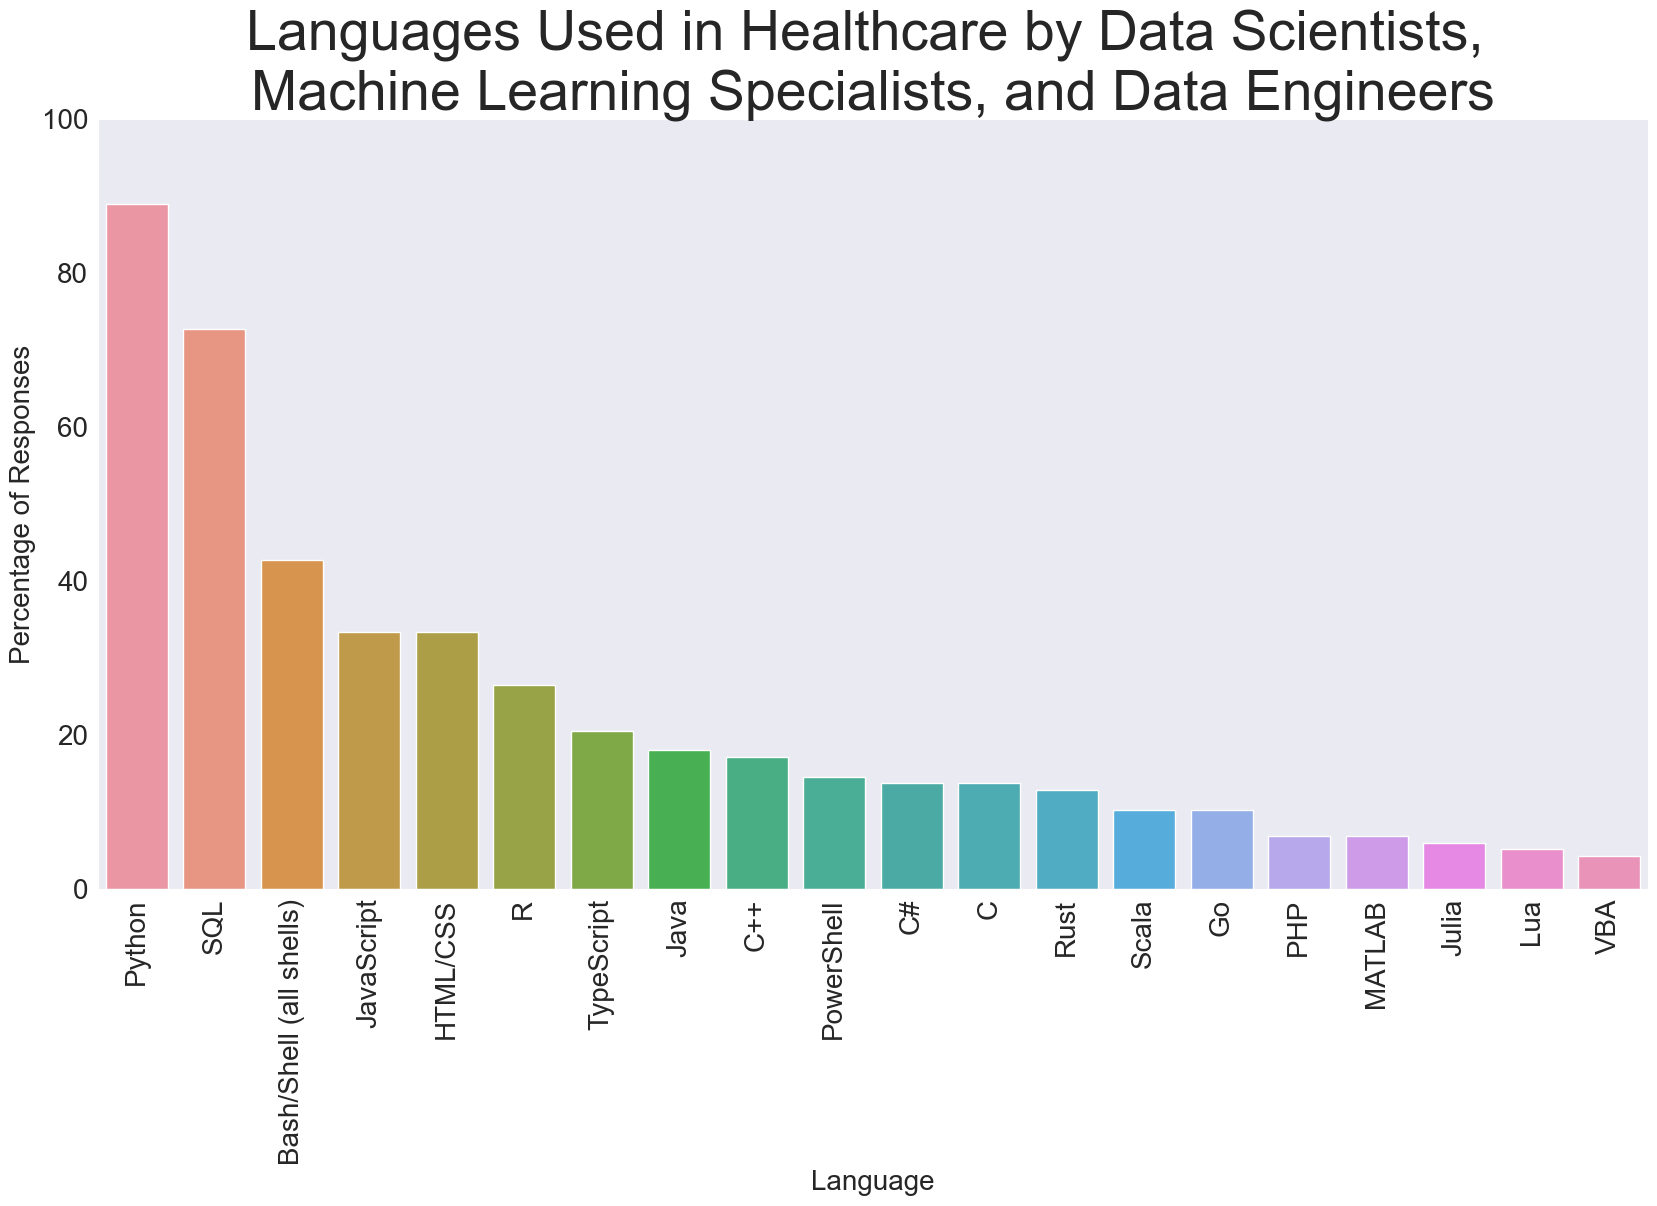

In [234]:
datajobs = ["Data scientist or machine learning specialist", "Engineer, data"]
df_Healthcare_datajobs = df_Healthcare[
    df_Healthcare["DevType"].isin(datajobs)
]

plotLanguages(df_Healthcare_datajobs, plot_title="Languages Used in Healthcare by Data Scientists, \nMachine Learning Specialists, and Data Engineers")

/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/yang.e/Downloads/stack-overflow-developer-survey-2023/menv/lib/python3.11/site-

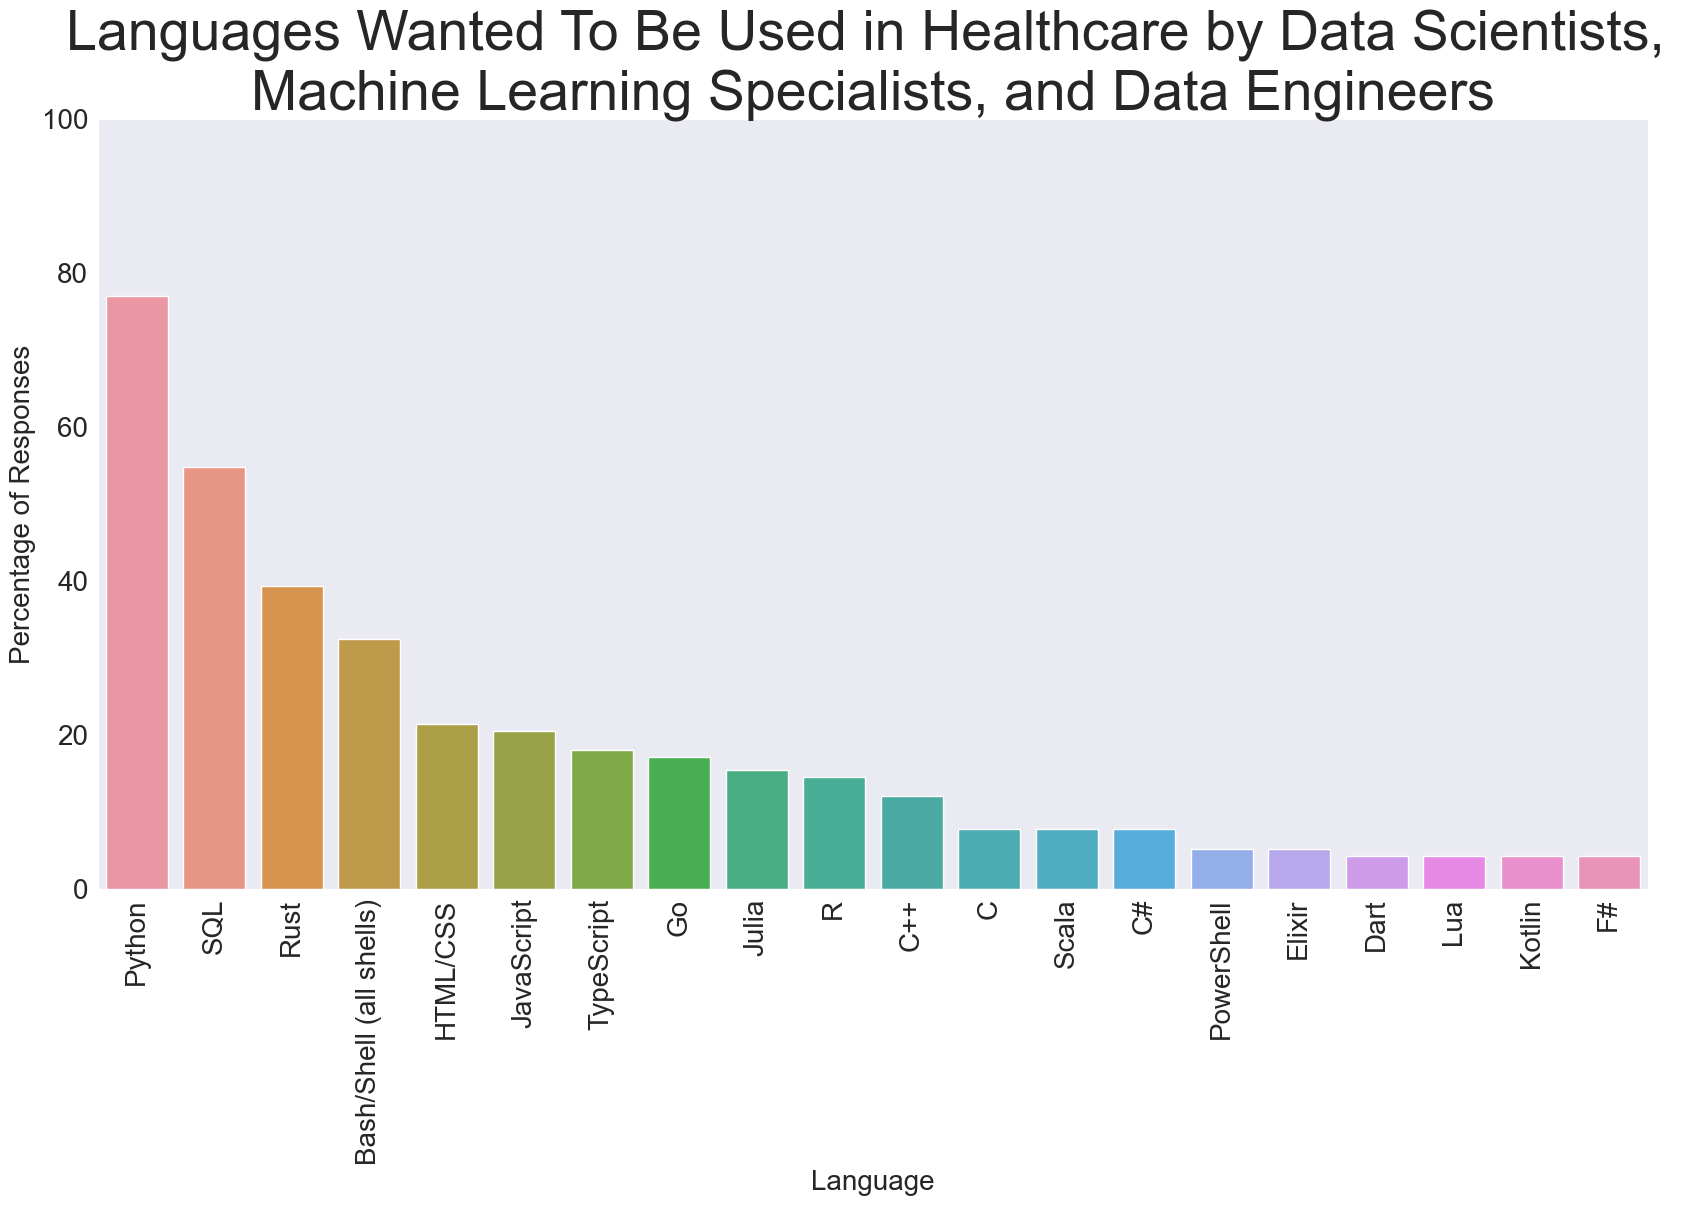

In [238]:
plotLanguages(
    df_Healthcare_datajobs, 
    column_to_count = "LanguageWantToWorkWith",
    plot_title="Languages Wanted To Be Used in Healthcare by Data Scientists, \nMachine Learning Specialists, and Data Engineers")